# Easy Rewardz: A study of sales through consumer behaviours

<h3>Column Description</h3>

<table>
    <tr>
        <th> Column Name </th> <th> Description </th>
    </tr>
    <tr> <td>ModifiedStore</td> <td>	Store Name </td>
    </tr>
    <tr> <td> ModifiedStoreCode </td> <td>		Store Code</td>
    </tr>
    <tr> <td> ModifiedTxnDate </td> <td>		Txn Date</td>
    </tr>
    <tr> <td> ModifiedTxnTime </td> <td>		Txn Time </td>
    </tr>
    <tr> <td> ModifiedBillNo </td> <td>		Bill No</td>
    </tr>
    <tr> <td> UniqueItemName </td> <td>		Item Name</td>
    </tr>
    <tr> <td> UniqueItemCode </td> <td>		Item Code </td>
    </tr>
    <tr> <td> Barcode </td> <td>		Barcode</td>
    </tr>
    <tr> <td> ItemQty </td> <td>		Item Qty</td>
    </tr>
    <tr> <td> ItemMRP </td> <td>		Item MRP</td>
    </tr>
    <tr> <td> ItemGrossAmount </td> <td>		Item Gross Amount</td>
    </tr>
    <tr> <td> ItemNetAmount </td> <td>	ItemNetAmount</td>
    </tr>
    <tr> <td> ItemDiscountAmount </td> <td>	ItemDiscountAmount</td>
    </tr>
    <tr> <td> Customer Id </td> <td>	Customer Id</td>
    </tr>
    
    
</table>




<H3> Analysis Points (Use Cases)</H3>

<UL>
    <LI> Growth Trend </LI>
    <UL>
        <LI> New Customers Acquired </LI>
        <LI> Total Transacting Customers </LI>
        <LI> Repeat Customers </LI>
        <LI> Bills </LI>
        <LI> Sales </LI>
        <LI> Product Brought </LI>
        <LI> Avg. Bill Value </LI>        
        <LI> Avg. Products in each Bill </LI>
        <LI> Avg. Single Product Price </LI>
    </UL>       
    <LI> Customer Fallout Rate </LI>
    <LI> Average Gap between 2 successive visits for Repeat Customers </LI>
    <LI> Product Affinity, Category Popularity, Weekday Vs Weekend Trend </LI>    
</UL>    

In [344]:
# Import various modules

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
import datetime as dt 

# import, instantiate, fit
from sklearn.linear_model import LinearRegression

#import train test split from sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [345]:
# Read data 

file_loc = "D:/DataScience/ProjectData/EasyRewardz/"
file_name = "ER Excel Case Study_October 2018.csv"

bf_data = pd.read_csv(file_loc+file_name, sep=',')

file_name = "item master.xlsx"

item_master = pd.read_excel(file_loc+file_name)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [346]:
# summary of the data (mean, STD, Min, Max)
bf_data.describe()

,ItemQty,ItemGrossAmount,ItemNetAmount,ItemPaidAmount,Customer Id,Unnamed: 16
count,283114.000000,283114.000000,283114.000000,2.831140e+05,283114.000000,0.0
mean,0.669589,1642.653494,1384.168981,2.965506e+07,45946.723482,NaN
std,0.642855,1216.694500,1225.746984,4.567273e+07,29125.264818,NaN
min,-3.000000,-12995.000000,-12995.000000,-1.199500e+04,1.000000,NaN
25%,0.000000,1159.360000,899.000000,1.036000e+03,19895.250000,NaN
50%,1.000000,1599.000000,1359.200000,1.695000e+03,44642.500000,NaN
75%,1.000000,1895.000000,1699.000000,1.000000e+08,71950.000000,NaN
max,25.000000,32375.000000,29137.500000,1.000000e+08,98260.000000,NaN


In [347]:
item_master.describe()

,UniqueItemCode,UniqueItemName,BarCode,DepartmentName,DepartmentCode,CategoryName,CategoryCode,SubCategoryName,SubCategoryCode,ItemDescription
count,36116,36116,36116,36116,36116,35128,35128,36116,36116,36086
unique,36063,15844,7983,3444,3444,39,39,21,21,71
top,\N,PLAINS,\N,OTSH,OTSH,TAILORED,TAILORED,PLAINS,PLAINS,PLAINS
freq,54,5418,28134,13746,13746,9614,9614,9461,9461,7307


In [348]:
bf_data.columns

Index(['ModifiedStore', 'ModifiedStoreCode', 'ModifiedTxnDate',
       'ModifiedTxnTime', 'ModifiedBillNo', 'UniqueItemName', 'UniqueItemCode',
       'Barcode', 'ItemQty', 'ItemMRP', 'ItemGrossAmount', 'ItemNetAmount',
       'ItemPaidAmount', 'ItemDiscountAmount', 'Customer Id', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18'],
      dtype='object')

In [349]:
item_master.columns

Index(['UniqueItemCode', 'UniqueItemName', 'BarCode', 'DepartmentName',
       'DepartmentCode', 'CategoryName', 'CategoryCode', 'SubCategoryName',
       'SubCategoryCode', 'ItemDescription'],
      dtype='object')

In [350]:
# how data is distributed 
bf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283114 entries, 0 to 283113
Data columns (total 19 columns):
ModifiedStore         283114 non-null object
ModifiedStoreCode     283114 non-null object
ModifiedTxnDate       283114 non-null object
ModifiedTxnTime       283114 non-null object
ModifiedBillNo        283114 non-null object
UniqueItemName        283114 non-null object
UniqueItemCode        283114 non-null object
Barcode               283114 non-null object
ItemQty               283114 non-null int64
ItemMRP               283114 non-null object
ItemGrossAmount       283114 non-null float64
ItemNetAmount         283114 non-null float64
ItemPaidAmount        283114 non-null float64
ItemDiscountAmount    283114 non-null object
Customer Id           283114 non-null int64
Unnamed: 15           283114 non-null object
Unnamed: 16           0 non-null float64
Unnamed: 17           2 non-null object
Unnamed: 18           283114 non-null object
dtypes: float64(4), int64(2), object(13)
m

In [351]:
item_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36116 entries, 0 to 36115
Data columns (total 10 columns):
UniqueItemCode     36116 non-null object
UniqueItemName     36116 non-null object
BarCode            36116 non-null object
DepartmentName     36116 non-null object
DepartmentCode     36116 non-null object
CategoryName       35128 non-null object
CategoryCode       35128 non-null object
SubCategoryName    36116 non-null object
SubCategoryCode    36116 non-null object
ItemDescription    36086 non-null object
dtypes: object(10)
memory usage: 2.8+ MB


In [352]:
#top 5 rows from dataset
bf_data.head()

,ModifiedStore,ModifiedStoreCode,ModifiedTxnDate,ModifiedTxnTime,ModifiedBillNo,UniqueItemName,UniqueItemCode,Barcode,ItemQty,ItemMRP,ItemGrossAmount,ItemNetAmount,ItemPaidAmount,ItemDiscountAmount,Customer Id,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,Agartala,TLHOS0062,28-12-2016,13:09:58,CM/02096/Dec/17,A56P1718-0001439,A56P1718-0001439,A56P1718-0001439,0,0,1098.56,1098.56,99999999.99,\N,10915,#VALUE!,NaN,08-15-2018,28-12-2016
1,Agartala,TLHOS0062,28-12-2016,13:09:58,CM/02096/Dec/17,A56P1718-0001439,A56P1718-0001439,A56P1718-0001439,0,0,1423.54,1423.54,99999999.99,\N,10915,#VALUE!,NaN,15-08-2018,28-12-2016
2,Agartala,TLHOS0062,28-12-2016,18:41:55,CM/02097/Dec/17,A56P1718-0001440,A56P1718-0001440,A56P1718-0001440,0,0,1423.54,1423.54,99999999.99,\N,11167,#VALUE!,NaN,NaN,28-12-2016
3,Agartala,TLHOS0062,28-12-2016,19:45:38,CM/02098/Dec/17,A56P1718-0001441,A56P1718-0001441,A56P1718-0001441,0,0,1334.81,1334.81,99999999.99,\N,11267,#VALUE!,NaN,NaN,28-12-2016
4,Agartala,TLHOS0062,28-12-2016,19:45:38,CM/02098/Dec/17,A56P1718-0001441,A56P1718-0001441,A56P1718-0001441,0,0,1334.81,1334.81,99999999.99,\N,11267,#VALUE!,NaN,NaN,28-12-2016


In [353]:
item_master.head()

,UniqueItemCode,UniqueItemName,BarCode,DepartmentName,DepartmentCode,CategoryName,CategoryCode,SubCategoryName,SubCategoryCode,ItemDescription
0,15612900001,15612900001,\N,OTAC,OTAC,NaN,NaN,ACCESSORIES,ACCESSORIES,ACCESSORIES
1,24737400001,24737400001,\N,OTAC,OTAC,NaN,NaN,ACCESSORIES,ACCESSORIES,ACCESSORIES
2,25513100001,25513100001,\N,OTTR,OTTR,RELAXED WASH,RELAXED WASH,TROUSER,TROUSER,TROUSER
3,25989900001,25989900001,\N,OTSH,OTSH,RELAXED WASH,RELAXED WASH,SHIRT,SHIRT,SHIRT
4,27099200001,27099200001,\N,OTSH,OTSH,TAILORED,TAILORED,SHIRT,SHIRT,SHIRT


In [354]:
#bottom 5 rows from dataset
bf_data.tail()

,ModifiedStore,ModifiedStoreCode,ModifiedTxnDate,ModifiedTxnTime,ModifiedBillNo,UniqueItemName,UniqueItemCode,Barcode,ItemQty,ItemMRP,ItemGrossAmount,ItemNetAmount,ItemPaidAmount,ItemDiscountAmount,Customer Id,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
283109,WB-Basirhat,TLHOS0127,09-12-2018,19:38:07,CM/00923/Sep/18,8.90784E+12,8.90784E+12,8.90784E+12,1,1499,1499.0,1499.0,1499.0,0,45687,#VALUE!,NaN,NaN,14-05-3443
283110,WB-Basirhat,TLHOS0127,09-12-2018,19:38:07,CM/00923/Sep/18,8.9077E+12,8.9077E+12,8.9077E+12,1,1699,1699.0,1699.0,1699.0,0,45687,#VALUE!,NaN,NaN,14-05-3443
283111,WB-Basirhat,TLHOS0127,09-12-2018,19:38:07,CM/00923/Sep/18,8.90784E+12,8.90784E+12,8.90784E+12,1,1499,1499.0,1499.0,1499.0,0,45687,#VALUE!,NaN,NaN,14-05-3443
283112,WB-Basirhat,TLHOS0127,09-12-2018,19:38:07,CM/00923/Sep/18,8.90784E+12,8.90784E+12,8.90784E+12,1,2999,2999.0,2999.0,2999.0,0,45687,#VALUE!,NaN,NaN,14-05-3443
283113,WB-Habra,TLHOS0125,09-12-2018,20:21:11,CM/00504/Sep/18,8.90784E+12,8.90784E+12,8.90784E+12,1,1599,1599.0,1599.0,1599.0,0,95028,#VALUE!,NaN,NaN,14-05-3443


In [355]:
item_master.tail()

,UniqueItemCode,UniqueItemName,BarCode,DepartmentName,DepartmentCode,CategoryName,CategoryCode,SubCategoryName,SubCategoryCode,ItemDescription
36111,8907194081674,WIND CHEATER,\N,OLWC,OLWC,LB CASUAL,LB CASUAL,WIND CHEATER,WIND CHEATER,WIND CHEATER
36112,8907429843497,WIND CHEATER,\N,OTWC,OTWC,RELAXED WASH,RELAXED WASH,WIND CHEATER,WIND CHEATER,WIND CHEATER
36113,8907429843879,WIND CHEATER,\N,OTWC,OTWC,RELAXED WASH,RELAXED WASH,WIND CHEATER,WIND CHEATER,WIND CHEATER
36114,8903572691947,WIND CHEATER,\N,OTWC,OTWC,RELAXED WASH,RELAXED WASH,WIND CHEATER,WIND CHEATER,WIND CHEATER
36115,8907101715463,WIND CHEATER,\N,OTWC,OTWC,RELAXED WASH,RELAXED WASH,WIND CHEATER,WIND CHEATER,WIND CHEATER


In [356]:
# Print Unique Store Names and count number of occurances for each

print('Unique Store Names: ', bf_data['ModifiedStore'].unique(), bf_data.groupby('ModifiedStore').size())
print('-----------------------------------------------------------------------------------')
print('Unique Stores Count: ', bf_data['ModifiedStore'].nunique())

Unique Store Names:  ['Agartala' 'Allahabad- City Centre' 'Asansol' 'Asansol -2'
 'Bangalore- HSR Layout' 'Barasat' 'BBSR' 'BBSR London Bridge'
 'BBSR Palheights' 'BBSR-Bhawani Mall' 'BBSR-Janpath'
 'BBSR-London Bridge-Forum' 'Bengalore Inorbit' 'Berhampore Murshidabad'
 'Bhillai' 'Bhopal DB Mall' 'Bihar Gaya' 'Brahmapur- Odisha' 'Chandannagar'
 'Chinsurah' 'City Centre I' 'City Centre II' 'Coochbehar' 'Cuttack'
 'Cuttack- Ranihat' 'Dhanbad' 'Dibrugarh' 'Gariahat' 'Gariahat-II'
 'Gorakhpur' 'Gorakhpur II' 'Guwahati' 'Guwahati - Fancy Bazar'
 'Guwahati - Tinsukia' 'Guwahati Ambari' 'Guwahati Spanish Garden'
 'Howrah A.C Market' 'Howrah Avani Mall' 'Howrah Avani Mall- LB'
 'Howrah Liluah Rangoli Mall' 'Jamshedpur' 'Jamshedpur - Bistupur'
 'Jamshedpur-II' 'Jharkhand Bokaro' 'Jorhat' 'KANCHRAPARA' 'Kankurgachi'
 'Kol Acropolis Mall' 'Kolkata B.T Road' 'Kolkata Behala'
 'Kolkata LB Ultadanga' 'Krishnagar' 'Lake Town' 'LB Asansol' 'LB Baruipur'
 'LB- Kancharapara' 'LB- Krishnanagar' 'LB Shya

In [357]:
customer_store=bf_data[['ModifiedStore','Customer Id']].drop_duplicates()
customer_store
customer_store.groupby(['ModifiedStore'])['Customer Id'].aggregate('count').reset_index().sort_values('Customer Id', ascending=False)

,ModifiedStore,Customer Id
70,Lindsay Street,3143
24,City Centre I,2761
100,Vivid Fashions ManiSquare,2275
32,Gariahat,1867
35,Gorakhpur II,1842
71,Madhyamgram,1807
33,Gariahat-II,1775
36,Guwahati,1775
113,WB-Barrackpore,1747
4,BBSR,1731


In [358]:
# Count orders with negative value in ItemQty col

bf_data[(bf_data['ItemQty'] < 0)].ItemQty.count() 


6800

In [359]:
NOW = dt.datetime(2018,10,1)

In [360]:
bf_data['InvoiceDate'] = pd.to_datetime(bf_data['ModifiedTxnDate'])

In [361]:
bf_data.dtypes

ModifiedStore                 object
ModifiedStoreCode             object
ModifiedTxnDate               object
ModifiedTxnTime               object
ModifiedBillNo                object
UniqueItemName                object
UniqueItemCode                object
Barcode                       object
ItemQty                        int64
ItemMRP                       object
ItemGrossAmount              float64
ItemNetAmount                float64
ItemPaidAmount               float64
ItemDiscountAmount            object
Customer Id                    int64
Unnamed: 15                   object
Unnamed: 16                  float64
Unnamed: 17                   object
Unnamed: 18                   object
InvoiceDate           datetime64[ns]
dtype: object

<h2>RFM Customer Segmentation</h2>

In [362]:
bf_data.head()

,ModifiedStore,ModifiedStoreCode,ModifiedTxnDate,ModifiedTxnTime,ModifiedBillNo,UniqueItemName,UniqueItemCode,Barcode,ItemQty,ItemMRP,ItemGrossAmount,ItemNetAmount,ItemPaidAmount,ItemDiscountAmount,Customer Id,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,InvoiceDate
0,Agartala,TLHOS0062,28-12-2016,13:09:58,CM/02096/Dec/17,A56P1718-0001439,A56P1718-0001439,A56P1718-0001439,0,0,1098.56,1098.56,99999999.99,\N,10915,#VALUE!,NaN,08-15-2018,28-12-2016,2016-12-28
1,Agartala,TLHOS0062,28-12-2016,13:09:58,CM/02096/Dec/17,A56P1718-0001439,A56P1718-0001439,A56P1718-0001439,0,0,1423.54,1423.54,99999999.99,\N,10915,#VALUE!,NaN,15-08-2018,28-12-2016,2016-12-28
2,Agartala,TLHOS0062,28-12-2016,18:41:55,CM/02097/Dec/17,A56P1718-0001440,A56P1718-0001440,A56P1718-0001440,0,0,1423.54,1423.54,99999999.99,\N,11167,#VALUE!,NaN,NaN,28-12-2016,2016-12-28
3,Agartala,TLHOS0062,28-12-2016,19:45:38,CM/02098/Dec/17,A56P1718-0001441,A56P1718-0001441,A56P1718-0001441,0,0,1334.81,1334.81,99999999.99,\N,11267,#VALUE!,NaN,NaN,28-12-2016,2016-12-28
4,Agartala,TLHOS0062,28-12-2016,19:45:38,CM/02098/Dec/17,A56P1718-0001441,A56P1718-0001441,A56P1718-0001441,0,0,1334.81,1334.81,99999999.99,\N,11267,#VALUE!,NaN,NaN,28-12-2016,2016-12-28


In [363]:
# Create RFM Table

rfmTable = bf_data.groupby(['Customer Id','ModifiedStore']).agg({'InvoiceDate': lambda x: (NOW - x.max()), 'ModifiedBillNo': lambda x: len(x), 'ItemNetAmount': lambda x: x.sum()})
#rfmTable['InvoiceDate'] = rfmTable['InvoiceDate'].astype(int)
rfmTable.rename(columns={'InvoiceDate': 'recency', 
                         'ModifiedBillNo': 'frequency', 
                         'ItemNetAmount': 'monetary_value'}, inplace=True)

In [364]:
rfmTable.head()

,,recency,frequency,monetary_value
Customer Id,ModifiedStore,,,
1,Guwahati - Fancy Bazar,304 days,1,1795.0
2,Sikkim Namchi,50 days,4,7588.0
3,Dibrugarh,304 days,4,10530.0
4,WB-Barrackpore,304 days,2,6665.0
5,Howrah A.C Market,273 days,2,2767.5


In [365]:
rfmTable.dtypes

rfmTable['recency'] = (rfmTable['recency']/ np.timedelta64(1, 'D')).astype(int)


In [366]:
rfmTable.head()

,,recency,frequency,monetary_value
Customer Id,ModifiedStore,,,
1,Guwahati - Fancy Bazar,304,1,1795.0
2,Sikkim Namchi,50,4,7588.0
3,Dibrugarh,304,4,10530.0
4,WB-Barrackpore,304,2,6665.0
5,Howrah A.C Market,273,2,2767.5


In [367]:
# We will use the 80% quantile for each feature
#quantiles = rfmTable.quantile(q=[0.8])
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75], axis=0)
quantiles = quantiles.to_dict()

segmented_rfm = rfmTable

print(quantiles)
segmented_rfm.head()

{'recency': {0.25: 77.0, 0.5: 147.0, 0.75: 232.0}, 'frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 3.0}, 'monetary_value': {0.25: 1599.0, 0.5: 2558.9549999999999, 0.75: 4657.2150000000001}}


,,recency,frequency,monetary_value
Customer Id,ModifiedStore,,,
1,Guwahati - Fancy Bazar,304,1,1795.0
2,Sikkim Namchi,50,4,7588.0
3,Dibrugarh,304,4,10530.0
4,WB-Barrackpore,304,2,6665.0
5,Howrah A.C Market,273,2,2767.5


In [368]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [369]:
segmented_rfm['r_quartile'] = segmented_rfm['recency'].apply(RScore, args=('recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(FMScore, args=('frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].apply(FMScore, args=('monetary_value',quantiles,))
segmented_rfm.head()

,,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile
Customer Id,ModifiedStore,,,,,,
1,Guwahati - Fancy Bazar,304,1,1795.0,4,4,3
2,Sikkim Namchi,50,4,7588.0,1,1,1
3,Dibrugarh,304,4,10530.0,4,1,1
4,WB-Barrackpore,304,2,6665.0,4,3,1
5,Howrah A.C Market,273,2,2767.5,4,3,2


In [370]:
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str) + segmented_rfm.m_quartile.map(str)
segmented_rfm.head()

,,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
Customer Id,ModifiedStore,,,,,,,
1,Guwahati - Fancy Bazar,304,1,1795.0,4,4,3,443
2,Sikkim Namchi,50,4,7588.0,1,1,1,111
3,Dibrugarh,304,4,10530.0,4,1,1,411
4,WB-Barrackpore,304,2,6665.0,4,3,1,431
5,Howrah A.C Market,273,2,2767.5,4,3,2,432


In [371]:
# top 10 best customers

segmented_rfm[segmented_rfm['RFMScore']=='111'].sort_values('monetary_value', ascending=False).head(10)


,,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
Customer Id,ModifiedStore,,,,,,,
17480,Guwahati Spanish Garden,51,229,351270.82,1,1,1,111
4748,Chandannagar,15,117,178799.16,1,1,1,111
20873,Chandannagar,39,153,164997.54,1,1,1,111
59000,Pune Seasons Mall,51,101,142523.20,1,1,1,111
1030,Gangtok,41,108,138149.56,1,1,1,111
28187,Allahabad- City Centre,35,92,136209.82,1,1,1,111
24198,Guwahati Spanish Garden,29,104,123383.32,1,1,1,111
1753,Nagaon,31,96,122906.68,1,1,1,111
1316,Vijayvada PVP Sqr,26,51,118057.35,1,1,1,111


In [372]:
New_Cust = bf_data.groupby(['Customer Id', 'ModifiedStore']).agg({'ModifiedTxnDate': lambda x: x.min(),'InvoiceDate': lambda x: (NOW - x.max()), 'ModifiedBillNo': lambda x: len(x), 'ItemNetAmount': lambda x: x.sum()})

In [373]:
New_Cust.head()

,,ModifiedTxnDate,InvoiceDate,ModifiedBillNo,ItemNetAmount
Customer Id,ModifiedStore,,,,
1,Guwahati - Fancy Bazar,12-01-2017,304 days,1,1795.0
2,Sikkim Namchi,08-12-2018,50 days,4,7588.0
3,Dibrugarh,12-01-2017,304 days,4,10530.0
4,WB-Barrackpore,12-01-2017,304 days,2,6665.0
5,Howrah A.C Market,01-01-2018,273 days,2,2767.5


In [374]:
New_Cust.rename(columns={'ModifiedTxnDate':'FirstTransDate',
                         'InvoiceDate': 'recency', 
                         'ModifiedBillNo': 'frequency', 
                         'ItemNetAmount': 'monetary_value'}, inplace=True)

In [375]:
New_Cust.head()

,,FirstTransDate,recency,frequency,monetary_value
Customer Id,ModifiedStore,,,,
1,Guwahati - Fancy Bazar,12-01-2017,304 days,1,1795.0
2,Sikkim Namchi,08-12-2018,50 days,4,7588.0
3,Dibrugarh,12-01-2017,304 days,4,10530.0
4,WB-Barrackpore,12-01-2017,304 days,2,6665.0
5,Howrah A.C Market,01-01-2018,273 days,2,2767.5


In [376]:
New_Cust.dtypes
New_Cust['FirstTransDate'] = pd.to_datetime(New_Cust['FirstTransDate'])
New_Cust['recency'] = (New_Cust['recency']/ np.timedelta64(1, 'D')).astype(int)

In [377]:
New_Cust = New_Cust[New_Cust['frequency'] >= 1]
#New_Cust = New_Cust[New_Cust['recency'] < 90]
New_Cust = New_Cust[New_Cust['FirstTransDate'] >= (NOW- dt.timedelta(days=90))] 
New_Cust.head()

,,FirstTransDate,recency,frequency,monetary_value
Customer Id,ModifiedStore,,,,
2,Sikkim Namchi,2018-08-12,50,4,7588.00
21,Lake Town,2018-08-04,58,2,1884.75
125,City Centre I,2018-08-15,47,4,4675.20
134,WB Katwa,2018-08-24,38,1,999.00
148,Ranchi,2018-09-03,28,11,14112.00


In [378]:
# Customer count for Customers who did their first transaction within last 90 days
New_Cust.count()

FirstTransDate    29938
recency           29938
frequency         29938
monetary_value    29938
dtype: int64

In [379]:
# Customers with Transaction within last 90 days

Trans_Cust = bf_data.groupby(['Customer Id', 'ModifiedStore']).agg({'ModifiedTxnDate': lambda x: x.max(),'InvoiceDate': lambda x: (NOW - x.max()), 'ModifiedBillNo': lambda x: len(x), 'ItemNetAmount': lambda x: x.sum()})

Trans_Cust.rename(columns={'ModifiedTxnDate':'LastTransDate',
                         'InvoiceDate': 'recency', 
                         'ModifiedBillNo': 'frequency', 
                         'ItemNetAmount': 'monetary_value'}, inplace=True)

Trans_Cust['LastTransDate'] = pd.to_datetime(Trans_Cust['LastTransDate'])

Trans_Cust = Trans_Cust[Trans_Cust['LastTransDate'] >= (NOW- dt.timedelta(days=90))] 

In [380]:
Trans_Cust.head()

,,LastTransDate,recency,frequency,monetary_value
Customer Id,ModifiedStore,,,,
21,Lake Town,2018-08-04,58 days,2,1884.75
52,Nagerbazar,2018-08-31,15 days,29,48222.30
59,Malda,2018-09-20,11 days,3,4393.00
103,Gorakhpur II,2018-07-16,77 days,4,4819.74
125,City Centre I,2018-08-15,47 days,4,4675.20


In [381]:
# Customer count for Customers who did their last transaction within last 90 days
Trans_Cust.count()

LastTransDate     30063
recency           30063
frequency         30063
monetary_value    30063
dtype: int64

In [389]:
Avg_Bill = bf_data.groupby(['ModifiedStore']).agg({'InvoiceDate': lambda x: (NOW - x.max()), 'ModifiedBillNo': lambda x: len(x), 'ItemNetAmount': lambda x: x.mean()})
Avg_Bill.sort_values('ItemNetAmount', ascending=False).head(10)

,InvoiceDate,ModifiedBillNo,ItemNetAmount
ModifiedStore,,,
Gorakhpur II,11 days,4195,1888.074725
Patna PM Mall,12 days,2141,1846.096254
Allahabad- City Centre,11 days,2912,1844.104808
Vijayvada PVP Sqr,11 days,2435,1811.526181
Siliguri,11 days,2125,1750.971454
BBSR,12 days,3635,1749.874336
Siliguri-II,11 days,1446,1740.764267
Jamshedpur - Bistupur,131 days,1554,1723.155405
Pune Seasons Mall,11 days,2771,1717.980946


In [390]:
bf_data['ItemNetAmount'].mean()

1384.1689809408463

<h3> Visualizing the Data on various parameters </h3>

In [393]:
%matplotlib inline

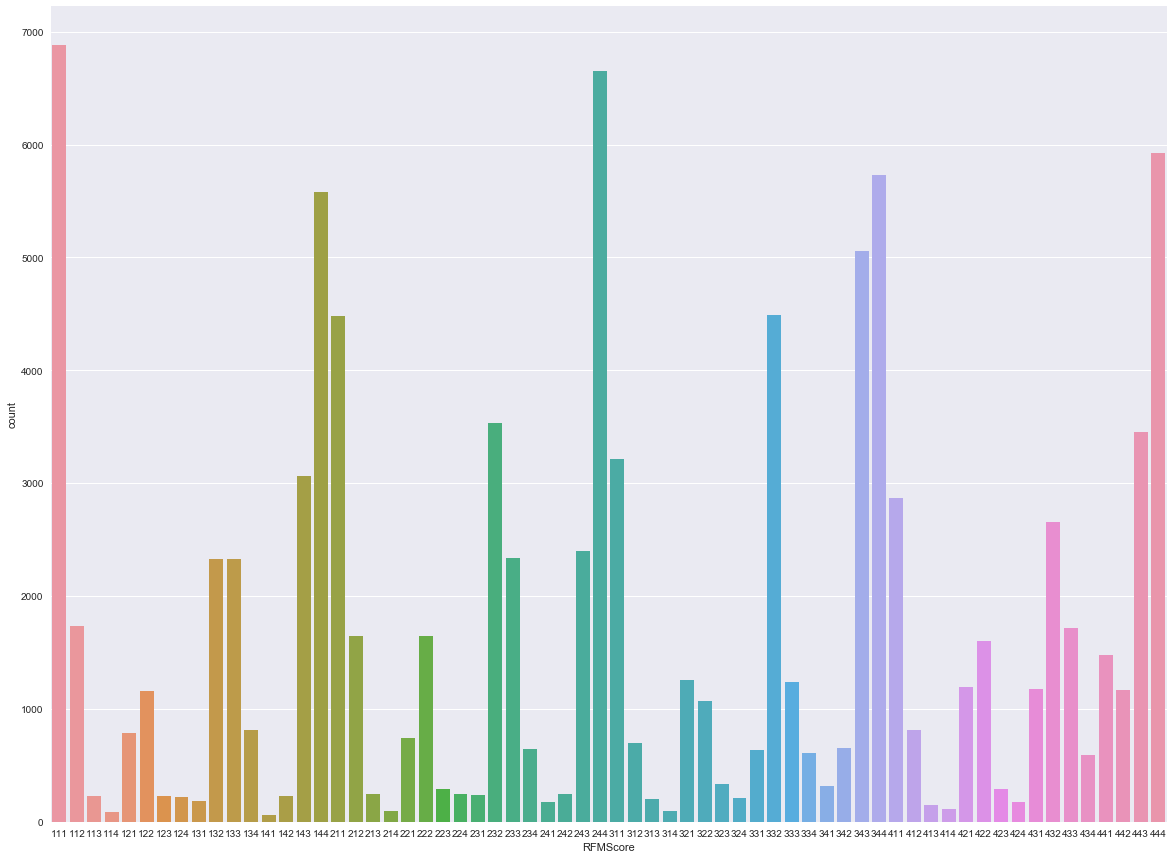

In [394]:
plt.figure(figsize=(20,15))
sns.countplot(segmented_rfm['RFMScore'])

In [ ]:
# Calculate RFM score and sort customers
# To do the 2 x 2 matrix we will only use Recency & Monetary
df_RFM = segmented_rfm
df_RFM.head()

In [ ]:
df_RFM['RMScore'] = segmented_rfm.m_quartile.map(str)+segmented_rfm.r_quartile.map(str)
df_RFM = df_RFM.reset_index()
df_RFM.head()

In [ ]:
df_RFM_SUM = df_RFM.groupby('RMScore').agg({'Customer Id': lambda y: len(y.unique()),
                                        'frequency': lambda y: round(y.mean(),0),
                                        'recency': lambda y: round(y.mean(),0),
                                        'r_quartile': lambda y: round(y.mean(),0),
                                        'm_quartile': lambda y: round(y.mean(),0),
                                        'monetary_value': lambda y: round(y.mean(),0)})


In [ ]:
df_RFM_SUM.head()

In [ ]:
df_RFM_SUM = df_RFM_SUM.reset_index()

df_RFM_SUM = df_RFM.groupby('RMScore').agg({'Customer Id': lambda y: len(y.unique()),
                                        'frequency': lambda y: round(y.mean(),0),
                                        'recency': lambda y: round(y.mean(),0),
                                        'r_quartile': lambda y: round(y.mean(),0),
                                        'm_quartile': lambda y: round(y.mean(),0),
                                        'monetary_value': lambda y: round(y.mean(),0)})

df_RFM_SUM.head()

In [ ]:
#
df_RFM_SUM = df_RFM_SUM.reset_index()
df_RFM_SUM = df_RFM_SUM.sort_values('RMScore', ascending=False)

# Visualize the Value Matrix and explore some key numbers
# 1) Average Monetary Matrix
df_RFM_M = df_RFM_SUM.pivot(index='m_quartile', columns='r_quartile', values='monetary_value')
df_RFM_M= df_RFM_M.reset_index().sort_values(['m_quartile'], ascending = False).set_index(['m_quartile'])
print(df_RFM_M)
# 2) Number of Customer Matrix
df_RFM_C = df_RFM_SUM.pivot(index='m_quartile', columns='r_quartile', values='Customer Id')
df_RFM_C= df_RFM_C.reset_index().sort_values(['m_quartile'], ascending = False).set_index(['m_quartile'])
print(df_RFM_C)
# 3) Recency Matrix
df_RFM_R = df_RFM_SUM.pivot(index='m_quartile', columns='r_quartile', values='recency')
df_RFM_R= df_RFM_R.reset_index().sort_values(['m_quartile'], ascending = False).set_index(['m_quartile'])
print(df_RFM_R)